In [5]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
from sklearn.cluster import KMeans
%matplotlib inline


In [6]:
data = pd.read_excel('ClustATI0011.xlsx',sheet_name='Лист1')
data.head()

,Имя,Чек,Статус,Заказы,Расстояние
0,Клиент 1,128.000000,0,1,10
1,Клиент 2,579.333333,0,3,4
2,Клиент 3,376.666667,0,6,21
3,Клиент 4,296.296000,0,1,10
4,Клиент 5,111.250000,1,16,17


In [14]:
data.describe()

,Чек,Статус,Заказы,Расстояние
count,2956.000000,2956.000000,2956.000000,2956.000000
mean,377.531648,0.320365,7.662382,15.158322
std,695.546854,0.466696,20.246477,20.980580
min,0.200000,0.000000,1.000000,0.000000
25%,120.000000,0.000000,1.000000,9.000000
50%,207.046667,0.000000,2.000000,10.000000
75%,380.000000,1.000000,5.000000,11.000000
max,14450.000000,1.000000,324.000000,238.000000


In [15]:
data.corr()

,Чек,Статус,Заказы,Расстояние
Чек,1.000000,0.016888,0.014185,-0.002329
Статус,0.016888,1.000000,0.292487,0.365627
Заказы,0.014185,0.292487,1.000000,-0.116355
Расстояние,-0.002329,0.365627,-0.116355,1.000000


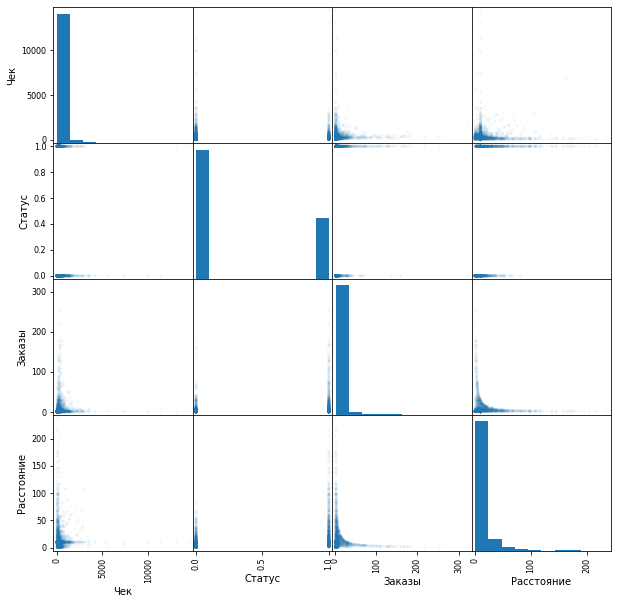

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,alpha=0.05,figsize=(10,10))
plt.show()

Text(0, 0.5, 'Расстояние')

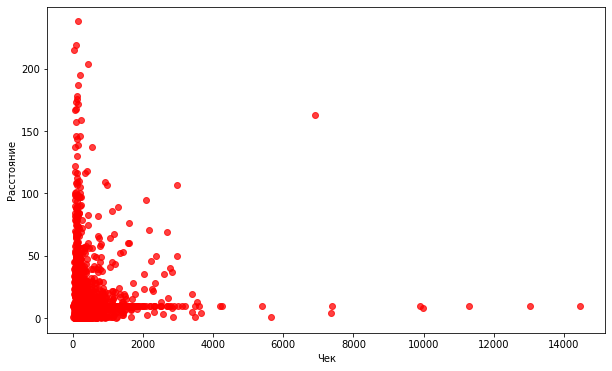

In [20]:
col1='Чек'
col2='Расстояние'


plt.figure(figsize=(10,6))

plt.scatter(data[col1],
            data[col2],
            alpha=0.75,
            color='red')
plt.xlabel(col1)
plt.ylabel(col2)

In [21]:
data_for_clust=data.drop(data.columns[0],axis=1).values

In [22]:
data_for_clust[0]

array([128.,   0.,   1.,  10.])

In [23]:
from sklearn import preprocessing
dataNorm=preprocessing.scale(data_for_clust)

In [24]:
data_dist=pdist(dataNorm,'euclidean')
data_linkage=linkage(data_dist,method='average')

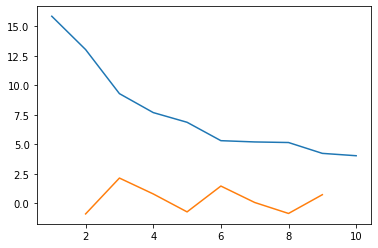

clusters: 3


In [26]:
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("clusters:", k)

In [27]:
#функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

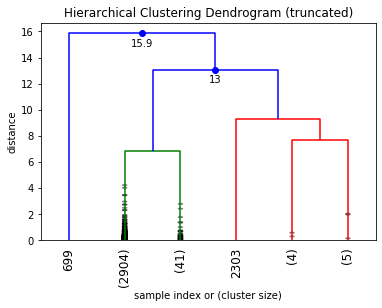

In [28]:
#
# указываем количество кластеров!
#
nCluster=6

#строим дендрограмму 
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nCluster, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

In [31]:
from scipy.cluster.hierarchy import fcluster
max_d=50
clusters=fcluster(data_linkage,max_d,criterion='distance')
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [32]:
k=6
clusters=fcluster(data_linkage,k,criterion='maxclust')
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

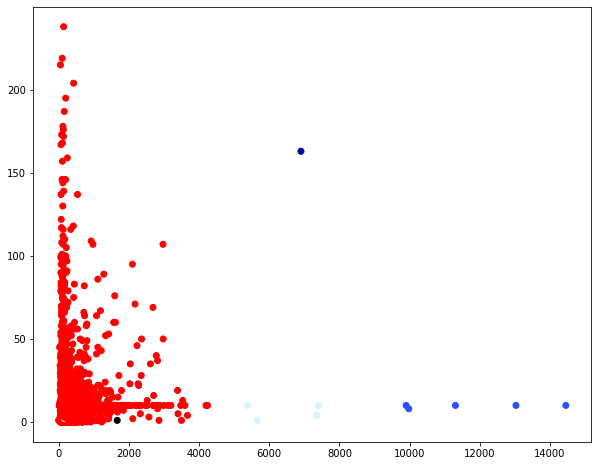

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(data_for_clust[:,0],data_for_clust[:,3],c=clusters,cmap='flag')
plt.show()

In [34]:
dataI=data
dataI['cluster_no']=clusters
writer = pd.ExcelWriter('result1.xlsx')
dataI.to_excel(writer,'IER')
writer.save()

In [35]:
km=KMeans(n_clusters=6).fit(dataNorm)

In [36]:
km.labels_+1

array([2, 2, 2, ..., 6, 2, 1])

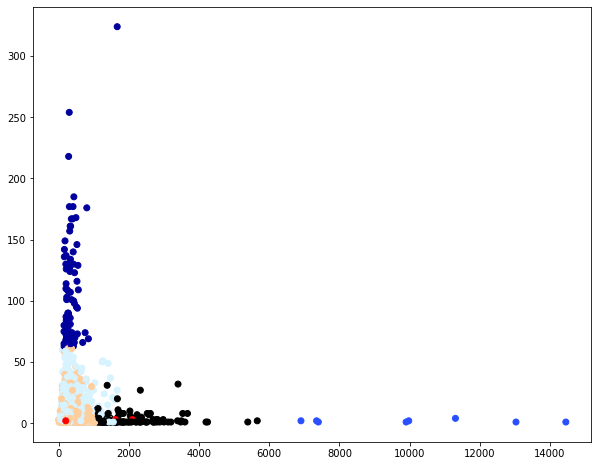

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(data_for_clust[:,0],data_for_clust[:,2],c=km.labels_,cmap='flag')
plt.show()

In [41]:
dataK=data
dataK['group_no']=clusters
writer=pd.ExcelWriter('resultwithKmeans.xlsx')
dataK.to_excel(writer,'KMeans')
writer.save()